# Notes

## Contents

- <a href="#Week-1-Lesson-1">Week 1 Lesson 1: Welcome + course overview</a>
  - 1 - 23 May 2017
- <a href="#Week-1-Lesson-2">Week 1 Lesson 2: Git + Github, Numpy + Pandas</a>
  - 2 - 25 May 2017
- <a href="#Week-2-Lesson-1">Week 2 Lesson 1: Visualisation</a>
  - 3 - 30 May 2017
- <a href="#Week-2-Lesson-2">Week 2 Lesson 2: Linear Regression</a>
  - 4 - 1 June 2017
- <a href="#Week-3-Lesson-1">Week 3 Lesson 1: Logistic Regression</a>
  - 5 - 6 June 2017
- <a href="#Week-3-Lesson-2">Week 3 Lesson 2: Model Evaluation</a>
  - 6 - 8 June 2017
- <a href="#Week-4-Lesson-1">Week 4 Lesson 1: Regularisation</a>
  - 7 - 13 June 2017
- <a href="#Week-4-Lesson-2">Week 4 Lesson 2: Clustering</a>
  - 8 - 15 June 2017
- <a href="#Week-5-Lesson-1">Week 5 Lesson 1: Recommendation Engines</a>
  - 9 - 20 June 2017
- <a href="#Week-5-Lesson-2">Week 5 Lesson 2: Databases + SQL in Python</a>
  - 10 - 22 June 2017
- <a href="#Week-6-Lesson-1">Week 6 Lesson 1: Decision trees</a>
  - 11 - 27 June 2017

## Week 1 Lesson 1
## Welcome + course overview
1 - 23 May 2017

### Course overview
* First, get a basic level of all the different areas of Data Science - theory, programming, statistics, visualisation, communication, subject matter expertise.
* Then get to go into further detail in more advanced areas.

### Additional readings
* Python for Data Analysis:  http://shop.oreilly.com/product/0636920023784.do
* Command Line Crash Course: http://cli.learncodethehardway.org/book/

----

## Week 1 Lesson 2
## Git + Github, Numpy + Pandas
2 - 25 May 2017

### Git
* Version control system that allows you to track files and file changes in a repository (“repo”)
* Primarily used by software developers
* Most widely used version control system
* Alternatives: Mercurial, Subversion, CVS
* Runs from the command line (usually)
* Can be used alone or in a team


### Github
* Allows you to put your Git repos online
* Alternative: Bitbucket
* Benefits of GitHub:
 * Backup of files
 * Visual interface for navigating repos
 * Makes repo collaboration easy
* Git does not require GitHub

<img src=git_chart.png width=500 align=left>

### Numpy

* Numpy can be used to perform general maths functions, and also create arrays of data!

In [14]:
import numpy as np

In [15]:
a = np.array( [20,30,40,50] )
a

array([20, 30, 40, 50])

In [16]:
b = np.arange(4)
b

array([0, 1, 2, 3])

In [17]:
c = a-b
c

array([20, 29, 38, 47])

In [18]:
d = b*2
d

array([0, 2, 4, 6])

In [19]:
e = np.random.randint(1,10,(2,3,4))
e

array([[[1, 2, 3, 9],
        [6, 7, 9, 1],
        [1, 9, 6, 7]],

       [[8, 4, 7, 1],
        [9, 6, 9, 2],
        [1, 9, 6, 5]]])

In [20]:
e[:1]

array([[[1, 2, 3, 9],
        [6, 7, 9, 1],
        [1, 9, 6, 7]]])

### Pandas
* Pandas is all about that reading. You can read files using pandas, including CSV files, URLs.

In [21]:
import pandas as pd

#### Importing data

In [22]:
pd.read_table('../data/u.user', header=None)
user_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_table('../data/u.user', sep='|', header=None, names=user_cols, index_col='user_id', dtype={'zip_code':str})

#### Exploring the data

In [23]:
users                   # print the first 30 and last 30 rows
type(users)             # DataFrame
users.head()            # print the first 5 rows
users.head(10)          # print the first 10 rows
users.tail()            # print the last 5 rows
users.index             # "the index" (aka "the labels")
users.columns           # column names (which is "an index")
users.dtypes            # data types of each column
users.shape             # number of rows and columns
users.values            # underlying numpy array
users.info()            # concise summary (including memory usage)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 1 to 943
Data columns (total 4 columns):
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip_code      943 non-null object
dtypes: int64(1), object(3)
memory usage: 36.8+ KB


In [24]:
#users['gender']         # select one column
#type(users['gender'])   # Series
#users[['gender']]
#type(users[['gender']])   # DataFrame
#users.gender            # select one column using the DataFrame attribute

In [25]:
#users.describe()                    # describe all numeric columns
#users.describe(include=['object'])  # describe all object columns (can include multiple types)
#users.describe(include='all')       # describe all columns
#users.gender.describe()             # describe a single column
users.age.mean()                    # only calculate the mean

34.05196182396607

In [26]:
#users.occupation.value_counts()     # most useful for categorical variables
users.age.value_counts()        # can also be used with numeric variables

30    39
25    38
22    37
28    36
27    35
26    34
24    33
29    32
20    32
32    28
23    28
35    27
21    27
33    26
31    25
19    23
44    23
39    22
40    21
36    21
42    21
51    20
50    20
48    20
49    19
37    19
18    18
34    17
38    17
45    15
      ..
47    14
43    13
46    12
53    12
55    11
41    10
57     9
60     9
52     6
56     6
15     6
13     5
16     5
54     4
63     3
14     3
65     3
70     3
61     3
59     3
58     3
64     2
68     2
69     2
62     2
11     1
10     1
73     1
66     1
7      1
Name: age, dtype: int64

#### Filtering

In [27]:
#young_bool = users.age < 20         # create a Series of booleans...
#users[young_bool]                   # ...and use that Series to filter rows
#users[users.age < 20]               # or, combine into a single step
#users[users.age < 20].occupation    # select one column from the filtered results
users[users.age < 20].occupation.value_counts()     # value_counts of resulting Series

student          64
other             4
none              3
writer            2
entertainment     2
artist            1
salesman          1
Name: occupation, dtype: int64

In [28]:
# logical filtering with multiple conditions
#users[(users.age < 20) & (users.gender=='M')]       # ampersand for AND condition
#users[(users.age < 20) | (users.age > 60)]          # pipe for OR condition
users[users.occupation.isin(['doctor', 'lawyer'])]  # alternative to multiple OR conditions

,age,gender,occupation,zip_code
user_id,,,,
10,53,M,lawyer,90703
125,30,M,lawyer,22202
126,28,F,lawyer,20015
138,46,M,doctor,53211
161,50,M,lawyer,55104
205,47,M,lawyer,06371
251,28,M,doctor,85032
299,29,M,doctor,63108
339,35,M,lawyer,37901


#### Sorting

In [29]:
users.age.sort_values()                   # sort a column
users.sort_values(by='age')                   # sort a DataFrame by a single column
users.sort_values(by='age', ascending=False)  # use descending order instead
users.sort_values(by=['occupation', 'age'])   # sort by multiple columns

,age,gender,occupation,zip_code
user_id,,,,
118,21,M,administrator,90210
180,22,F,administrator,60202
282,22,M,administrator,20057
317,22,M,administrator,13210
439,23,F,administrator,20817
509,23,M,administrator,10011
394,25,M,administrator,96819
665,25,M,administrator,55412
726,25,F,administrator,80538


#### Missing values
scikit-learn models expect that all values are numeric and hold meaning. Thus, missing values are not allowed by scikit-learn. One possible strategy is to just drop missing values:

In [30]:
users.age.value_counts()              # excludes missing values
users.age.value_counts(dropna=False)  # includes missing values

30    39
25    38
22    37
28    36
27    35
26    34
24    33
29    32
20    32
32    28
23    28
35    27
21    27
33    26
31    25
19    23
44    23
39    22
40    21
36    21
42    21
51    20
50    20
48    20
49    19
37    19
18    18
34    17
38    17
45    15
      ..
47    14
43    13
46    12
53    12
55    11
41    10
57     9
60     9
52     6
56     6
15     6
13     5
16     5
54     4
63     3
14     3
65     3
70     3
61     3
59     3
58     3
64     2
68     2
69     2
62     2
11     1
10     1
73     1
66     1
7      1
Name: age, dtype: int64

In [31]:
users.age.isnull()           # True if missing, False if not missing
#users.age.isnull().sum()     # count the missing values
#users.age.notnull()          # True if not missing, False if missing
#users[users.age.notnull()]  # only show rows where continent is not missing

user_id
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
       ...  
914    False
915    False
916    False
917    False
918    False
919    False
920    False
921    False
922    False
923    False
924    False
925    False
926    False
927    False
928    False
929    False
930    False
931    False
932    False
933    False
934    False
935    False
936    False
937    False
938    False
939    False
940    False
941    False
942    False
943    False
Name: age, dtype: bool

In [32]:
# use 'tilde' ~ to negate the boolean values
~users.age.isnull()  

user_id
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
30     True
       ... 
914    True
915    True
916    True
917    True
918    True
919    True
920    True
921    True
922    True
923    True
924    True
925    True
926    True
927    True
928    True
929    True
930    True
931    True
932    True
933    True
934    True
935    True
936    True
937    True
938    True
939    True
940    True
941    True
942    True
943    True
Name: age, dtype: bool

In [33]:
users.isnull()             # DataFrame of booleans
users.isnull().sum()       # count the missing values in each column

age           0
gender        0
occupation    0
zip_code      0
dtype: int64

Another way is to impute missing values:

In [34]:
users.age.fillna(value='NA')                 # fill in missing values with 'NA'
users.age.fillna(value='NA', inplace=True)   # modifies 'drinks' in-place
# Fill any null values of age by taking average by gender, class and parch
users['age']=users[['occupation','gender']].groupby(['occupation','gender'])['age'].transform(lambda x: x.fillna(x.mean()))


KeyError: 'Column not found: age'

In [ ]:
users.sum(axis=0)      # sums "down" the 0 axis (rows)
users.sum()            # axis=0 is the default
users.sum(axis=1)      # sums "across" the 1 axis (columns)

### Additional readings
[Basic Git commands list]("https://confluence.atlassian.com/bitbucketserver/basic-git-commands-776639767.html")

[Good resourses]("https://help.github.com/articles/git-and-github-learning-resources/")

---

## Week 2 Lesson 1
## Visualisation
3 - 30 May 2017

In [ ]:
import urllib
import matplotlib.pyplot as plt
#!pip install seaborn
import seaborn as sns
#!pip install seaborn
import plotly
import plotly.plotly as py
import plotly.graph_objs as go 
#!pip install folium
import folium
import plotly.figure_factory as ff

plotly.tools.set_credentials_file(username='Msquirchuk', api_key='kTj4gydNrsbGuMDjMcNn')

%matplotlib inline
sns.set(color_codes=True)

### What is data visualisation?
* Data visualisation is the representation of data in a graphical way to more easily or clearly convey the patterns in data.

### Why do we visualise data?
* Visualisation helps data analysts:
 * understand the data and what patterns exist (exploratory);
 * explain the data to non-data-ists (reporting) or in a simple way.
* The greatest value of a picture is when it forces us to notice what we never expected to see. - John W Tukey, Exploratory Data Analysis, 1977.

### How can we visualise data?
* There are many data visualisation tools: the easier ones to use can do less stuff.

<img src="pythonvislandscape.png" width=450 align=left>
<img src="chart-suggestions.png" width=450 align=right>

### How do we visualise data?

#### Bar charts
* Shows numeric summaries across different categories (either horizontally or vertically).

In [ ]:
y = [3, 10, 7, 5, 3, 4.5, 6, 8.1]
N = len(y)
x = range(N)
plt.bar(x, y)

In [ ]:
zoodata = [go.Bar(
 x=['giraffes', 'orangutans', 'monkeys'],
 y=[20, 14, 23]
 )]

py.iplot(zoodata)

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/school_earnings.csv")

trace_women = Bar(x=df.School,
                  y=df.Women,
                  name='Women',
                  marker=dict(color='#ffcdd2'))

trace_men = Bar(x=df.School,
                y=df.Men,
                name='Men',
                marker=dict(color='#A2D5F2'))

trace_gap = Bar(x=df.School,
                y=df.gap,
                name='Gap',
                marker=dict(color='#59606D'))

data = [trace_women, trace_men, trace_gap]
layout = Layout(title="Average Earnings for Graduates",
                xaxis=dict(title='School'),
                yaxis=dict(title='Salary (in thousands)'))

fig = Figure(data=data, layout=layout)

py.iplot(fig, filename='styled_bar')

#### Histograms
* Shows the distribution of data over a continuous interval
* Allows us to see the shape of our data

In [ ]:
raw_data=urllib.request.urlopen("http://goo.gl/HppjFh")
dataset = pd.read_csv(raw_data, delimiter=",", names=('sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'))
dataset[['sepal_width']].hist()

In [ ]:
dataset.loc[dataset['species'] == 'Iris-setosa','sepal_length'].hist()

In [ ]:
x = np.random.randn(500)
data = [go.Histogram(x=x)]
py.iplot(data, filename='basic histogram') 

#### Scatterplots
* Shows values between two variables, one on each axis.
* Used to see a relationship between variables

In [ ]:
plt.scatter(dataset['sepal_length'],dataset['sepal_width'],100,'rgb')

In [ ]:
sns.lmplot(x='sepal_width', y="sepal_length", hue="species", data=dataset, fit_reg=True)

In [ ]:
sns.jointplot(x="sepal_width", y="sepal_length", data=dataset)

In [ ]:
sns.pairplot(dataset, hue='species');

In [ ]:
N = 1000
random_x = np.random.randn(N)
random_y = np.random.randn(N)
trace = go.Scatter(
 x = random_x,
 y = random_y,
 mode = 'markers'
)
data = [trace]
py.iplot(data, filename='basic-scatter')

#### Box and whisker plots
* Displays numerical distribution summaries by groups through quartiles
* Can compare different distributions 

In [ ]:
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low), 0)

plt.boxplot(data)

In [ ]:
spread = np.random.rand(50) * 100
center = np.ones(25) * 40
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
d2 = np.concatenate((spread, center, flier_high, flier_low), 0)
data.shape = (-1, 1)
d2.shape = (-1, 1)
# data = concatenate( (data, d2), 1 )
# Making a 2-D array only works if all the columns are the
# same length.  If they are not, then use a list instead.
# This is actually more efficient because boxplot converts
# a 2-D array into a list of vectors internally anyway.
data = [data, d2, d2[::2, 0]]
# multiple box plots on one figure
plt.figure()
plt.boxplot(data)

In [ ]:
y0 = np.random.randn(50)-1
y1 = np.random.randn(50)+1
trace0 = go.Box(
 y=y0
)
trace1 = go.Box(
 y=y1
)
data = [trace0, trace1]
py.iplot(data) 

#### Density plots
* Similar to a histogram but smooths out the distribution with a continuous line
* Not affected by bin choices 

In [1]:
from scipy.stats import gaussian_kde

data = [1.5]*7 + [2.5]*2 + [3.5]*8 + [4.5]*3 + [5.5]*1 + [6.5]*8

density = gaussian_kde(data)
xs = np.linspace(0,8,200)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs))
plt.show()

NameError: name 'np' is not defined

#### Heat maps
* Colour coding applied to tabular data.
* Provides a generalised view of the data by each cell 

In [ ]:
x = np.random.randn(8873)
y = np.random.randn(8873)

heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

In [ ]:
trace = go.Heatmap(z=[[1, 20, 30],
 [20, 1, 60],
 [30, 60, 1]])
data=[trace]
py.iplot(data, filename='basic-heatmap') 

In [ ]:
x = np.random.randn(2000)
y = np.random.randn(2000)
plotly.offline.iplot([Histogram2dContour(x=x, y=y, contours=Contours(coloring='heatmap')),
       Scatter(x=x, y=y, mode='markers', marker=Marker(color='white', size=3, opacity=0.3))], show_link=False)

#### Line graphs
* Used to display a numeric value over a continuous value or time
* Used to observe trends and changes over time

In [ ]:
y = range(3)
x = [3,4,5]
plt.plot(x,y)

In [ ]:
N = 500
random_x = np.linspace(0, 1, N)
random_y = np.random.randn(N)
trace = go.Scatter(
 x = random_x,
 y = random_y
)
data = [trace]
py.iplot(data, filename='basic-line') 

#### Parallel coordinates
* Plot multiple numeric variables across each observation
* Each axis is scaled and each line through the graph is an observation

In [ ]:
data = [
    go.Parcoords(
        line = dict(color = 'blue'),
        dimensions = list([
            dict(range = [1,5],
                 constraintrange = [1,2],
                 label = 'A', values = [1,4]),
            dict(range = [1.5,5],
                 tickvals = [1.5,3,4.5],
                 label = 'B', values = [3,1.5]),
            dict(range = [1,5],
                 tickvals = [1,2,4,5],
                 label = 'C', values = [2,4],
                 ticktext = ['text 1', 'text 2', 'text 3', 'text 4']),
            dict(range = [1,5],
                 label = 'D', values = [4,2])
        ])
    )
]

py.iplot(data, filename = 'parcoord-dimensions')

In [2]:
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates (dataset, 'species')

NameError: name 'dataset' is not defined

#### Maps
* Allows us to plot points geographically
* We can overlay information on a map, usually loaded as a collection of ‘tiles’. 

In [ ]:
map_object = folium.Map(location=[-33.8, 151.2], zoom_start=2,
tiles="Stamen toner")
marker = folium.features.Marker([-33.869824, 151.206423],popup="General Assembly!")
map_object.add_child(marker) 

In [ ]:
df_airports = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
df_airports.head()

df_flight_paths = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_aa_flight_paths.csv')
df_flight_paths.head()

airports = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df_airports['long'],
        lat = df_airports['lat'],
        hoverinfo = 'text',
        text = df_airports['airport'],
        mode = 'markers',
        marker = dict(
            size=2,
            color='rgb(255, 0, 0)',
            line = dict(
                width=3,
                color='rgba(68, 68, 68, 0)'
            )
        ))]

flight_paths = []
for i in range( len( df_flight_paths ) ):
    flight_paths.append(
        dict(
            type = 'scattergeo',
            locationmode = 'USA-states',
            lon = [ df_flight_paths['start_lon'][i], df_flight_paths['end_lon'][i] ],
            lat = [ df_flight_paths['start_lat'][i], df_flight_paths['end_lat'][i] ],
            mode = 'lines',
            line = dict(
                width = 1,
                color = 'red',
            ),
            opacity = float(df_flight_paths['cnt'][i])/float(df_flight_paths['cnt'].max()),
        )
    )

layout = dict(
        title = 'Feb. 2011 American Airline flight paths<br>(Hover for airport names)',
        showlegend = False,
        height = 800,
        geo = dict(
            scope='north america',
            projection=dict( type='azimuthal equal area' ),
            showland = True,
            landcolor = 'rgb(243, 243, 243)',
            countrycolor = 'rgb(204, 204, 204)',
        ),
    )

fig = dict( data=flight_paths + airports, layout=layout )

py.iplot(fig)

### Charts to avoid
* Stacked area maps
* Word clouds
* Pie charts

### Additional readings
* Edward Tuſte, The Visual Display of Quantitative Information
* Leland Wilkinson, The Grammar of Graphics
* Scott Murray, Interactive Data Visualisation for the Web (free online)
* flowingdata.com
* New York Times (Upshot)

---

## Week 2 Lesson 2
## Linear Regression
4 - 1 June 2017

### Supervised vs unsupervised learning
* Supervised learning is where there is a target output - we want something to come out of our model.
 * Regression: If the target variable is numeric then we have a regression problem.
 * cf. Classification: If the target variable is a category (for example trying to predict a type of flower) the we have a classification problem - we are trying to classify what group that y belongs to.
 * Features: Data values that provide information to help guess the target, aka predictor or independent variables.
* Unsupervised learning is where there is no output, but we want to observe the model of the data, e.g. for exploration. We want to find some underlying structure or patterns in the data but in this case we don’t have any labeled data.

### Linear Regression 
* We want to model a linear relationship (think straight line) between our target variable y and our input variable x:
y=Xβ+ϵ, where:
 * y = target variable
 * X = input variable
 * β = coefficients
 * ϵ = error term 
* It is the explanation of a continuous variable given a series of independent variables.
* The simplest version is just a line of best fit: y = mx + b... It explains the relationship between x and y using the starting point b and the power in explanation m.
* Linear regression is a simple approach to supervised learning. It assumes that the dependence of Y on X1, X2 ,… Xp is linear. True regression functions are never linear.
* Linear relationship in the parameters, β, we can transform the actual values of the inputs if we want.
* Variance of the error term, ϵ, is constant. This means there is no systematic pattern in the values of X and the variance of ϵ. The mean of ϵ = 0. ϵ has a normal distribution. If it does not, it could introduce bias. 
* There will be no perfect (or near perfect) co-linearity between any of the input variables. Otherwise the fitting procedure will break. 


#### How it works
_Ordinary Least Squares_
<img src="linear-regression-rss.png" align=right width=300>
* Creating a linear regression model is really about minimising the _Residual Sum of Squares_ or RSE. This is the Sum of the squared difference between our observed value and the value from the model. That is: <img src="RSS-equation.png" width=400>
* Wording the function as: <img src="linear-equation.png">
* Wording RSS as a function of e (error): <img src="rssaserror.png">
* Error is just the difference between yi and y as it is observed. So, expanding: <img src="rssaserror2.png">
* Resolving this equation, it means:
<img src="OLS.png">



#### R-Squared
* R-squared is the central metric introduced for linear regression. The closer to 1 the R-squared, the better the fit. 
* R-squared measures explain variance, but it doesn't tell the magnitude or scale of error.

<img src="R2-equations.png" width=500 align=left>

### Multiple linear regression
* Multi-dimensions allows for complex models even with linear components.

<img src="multiple-linear-regression2.png" align=right width=200 >

* The ideal scenario is when the predictors are uncorrelated:
 * Interpretations can be made such as “a unit change in Xj is associated with a βj change in Y , while all the other variables stay fixed”.
 * Correlations amongst predictors cause problems when Xj changes, everything else changes.

 <img src="multiple-linear-regression.png" align=left width=400>


#### Make sure you visualise your data and check the actual model fit !!! 
See [Anscombe's Quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet) for why!
<img src="anscombes-quartet.png" width=400 align=right>

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

house_data = pd.read_csv("../data/chicagohouseprices2.csv", index_col=0)
house_data.head(1)
#replace missing data
house_data.fillna(value='NA', inplace=True) 
#look at the correlations between the data
pd.scatter_matrix(house_data, figsize=(15,15))

In [ ]:
#create the linear model
lm1 = smf.ols(formula='Price ~ Bath + HouseSizeSqft', data=house_data).fit()
#print the coefficients
lm1.params
#print the regression results
lm1.summary()

In [ ]:
lm2 = smf.ols(formula='Price ~ Bath + CrimeIndex + MinutesToLoop + MilesToLake + Age + LotSizeSqft + HouseSizeSqft + SchoolIndex + EstimatedPrice', data=house_data).fit()
lm2.params
lm2.summary()

---

## Week 3 Lesson 1
## Logistic Regression
5 - 6 June 2017

### Regression vs Classification
* If the y variable is numeric then we have a regression problem - we are trying to predict a continuous number
* If the y variable is a category (for example trying to predict a type of flower) the we have a classification problem - we are trying to classify what group that y belongs to.
* We want to build a classifier that correctly identifies which class our target variable y belongs to given our input variable x. 
* Why not use the linear regression model? y=Xβ+ϵ
 * If we only have a binary response variable (0 or 1) it might make sense… BUT we can have our estimated value of y > 1 or y < 0 … which doesn’t make sense.
 * What of the case where we have more than one class? Linear regression cannot easily handle these cases.
 * We want a classification method that can handle these cases and give us results we can easily interpret. 

<img src="logit-function.png" width=400 align=right>
### p(1|x) = β0+β1
* This is a good starting point but we still have the problem of p(Y) being outside the 0,1 range.
* We need to model p(Y=1|X) using a function that gives outputs between 0 and 1. Basically we want something that looks like the following:
<img src="logistic-regression.png" width=300 align=right>



* We can see that it this function is linear in X
 * p | (p - 1) is called the ‘odds’ and can be any value from 0 to ∞
 * log ( p | (p - 1) ) is called the ‘log-odds’ or ‘logit’

### Accuracy Score
* This is simply the fraction of correct predictions from the model. So it is the number of correct predictions divided by the number of observations in our dataset.

<img src="confusion-matrix.png" align=right>
### Confusion Matrix
* A confusion matrix shows us what the predicted class was against what the actual class was. 
* The true class makes up the rows or the vertical axes and the predicted class makes up the columns or the horizontal axis.
* Any entries in the diagonal of the matrix are those that are correctly classified. 


<img src="roc-curve.png" align=right>
### Receiver Operating Characteristic

* The Receiver Operating Characteristic or ROC curve shows the performance of a binary classifier system as its discrimination threshold is varied. 
* It is created by plotting the fraction of true positives out of the positives (TPR = true positive rate) vs. the fraction of false positives out of the negatives (FPR = false positive rate), at various threshold settings.
* By computing the Area Under the Curve of the ROC curve we get a single number summary of accuracy.
* The closer that number is to 1 the more accurate our model is. 


In [35]:
import pandas as pd
#read the data
titanic = pd.read_csv('../data/titanic.csv', index_col='PassengerId')
#define the columns to read (x), and the target (y)
feature_cols = ['Pclass', 'Parch']
X = titanic[feature_cols]
y = titanic.Survived
#split the data
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
#fit the logreg model and print the coefficients
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])
print(logreg.fit(X_train, y_train))

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [36]:
#make predictions on testing set and test accuracy
y_pred_class = logreg.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))
#print the confusion matrix
from sklearn import metrics
prds = logreg.predict(X)
print(metrics.confusion_matrix(y_test, y_pred_class))

0.668161434978
[[105  23]
 [ 51  44]]


In [ ]:
#generate the ROC curve
import matplotlib.pyplot as plt
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = logreg.predict_proba(X_test)[:,1]
# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)
# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr,tpr)
# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
# What's happening here is we are changing the cutoff value from 0 to 1.
# When we have a cutoff of zero this means that we have no positive predictions so both fpr and tpr are both 0
# Our aim when modelling is to maximise the area under the curve, the closer to one the better the model.

0.80269058296


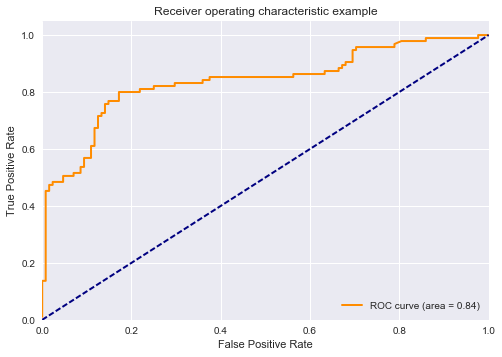

In [40]:
#split data into binaries where not binary
titanic_with_dummies = pd.get_dummies(data=titanic, columns = ['Sex', 'Embarked', 'Pclass'], prefix = ['Sex', 'Embarked', 'Pclass'] )
titanic_with_dummies['Age'] = titanic_with_dummies[['Age',"Parch","Sex_male",'Pclass_1', 'Pclass_2']].groupby(["Parch","Sex_male",'Pclass_1', 'Pclass_2'])['Age'].transform(lambda x: x.fillna(x.mean()))
feature_cols = ['Parch', 'Sex_male', 'Sex_female', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Fare', 'Age']
X = titanic_with_dummies[feature_cols]
y = titanic_with_dummies.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])
y_pred_class = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))
preds = logreg.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### KNN Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(5)
KNN_model.fit(X_train, y_train)
y_pred_class = KNN_model.predict(X_test)
# Print the new accuracy rate
print(metrics.accuracy_score(y_test, y_pred_class))

In [ ]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)
y_pred_class = NB_model.predict(X_test)
# Print the new accuracy rate
print(metrics.accuracy_score(y_test, y_pred_class))

### Additional readings
* Logistic Regression applied to loan applications https://github.com/nborwankar/LearnDataScience
* Odds Ratio in Logistic Regression http://www.ats.ucla.edu/stat/mult_pkg/faq/general/odds_ratio.htm

---

## Week 3 Lesson 2
## Model Evaluation
6 - 8 June 2017

### What is model evaluation?
* Model evaluation is how we test whether our model works on new data.

### Why do we do model evaluation?
* A model bsed on training data has a set error - the training error - for how well the model fits training data. This is a good way to see how the model fits _that_ data, but not all data. 
* We want to test other data on the model for a better measure of accuracy.
* Without model evaluation, you run the risk of over-fitting the training data, which will have high accuracy for the training data but low accuracy for everything else.
* This is what we call **bias**: if your model has too much bias, it will be accurate for the training data, but will be too closely fit to the data and so won't have the same accuracy for new data.
* **Variance** is the opposite: if your model has too much variance, it won't be accurate for the training data, because it's not fit well enough.
<img src="bias-and-variance.png">

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

#### High Variance, Low Bias:

In [ ]:
df = pd.read_table('http://people.sc.fsu.edu/~jburkardt/datasets/regression/x01.txt', sep='\s+', skiprows=33, names=['id','brain','body'], index_col='id')
np.random.seed(12345)
df = df[df.body < 200]
df['sample'] = np.random.randint(1, 3, len(df))

sns.lmplot(x='body', y='brain', data=df, ci=None, hue='sample')
sns.plt.xlim(-10, 200)
sns.plt.ylim(-10, 250)

#### Low Variance, High Bias

In [ ]:
sns.lmplot(x='body', y='brain', data=df, ci=None, hue='sample', order=8)
sns.plt.xlim(-10, 200)
sns.plt.ylim(-10, 250)

#### Good balance

In [ ]:
sns.lmplot(x='body', y='brain', data=df, ci=None, hue='sample', order=2)
sns.plt.xlim(-10, 200)
sns.plt.ylim(-10, 250)

### How do we do model evaluation?
* We do model evaluation by separating out training data and test data from our dataset, and using the training data to build the model. We then test its accuracy on test data. This is the out-of-sample error (OOS).
* If we had a different training/test split, the OOS error would be different.
* One way of improving this will be to use multiple splits for test and training data. Train the model with different splits of data, and test with the rest from that split.
* This is called **cross-validation**.

In [ ]:
#We'll be using logistic regression with Titanic dataset:
import pandas as pd
titanic = pd.read_csv('../data/titanic.csv', index_col='PassengerId')
#Imputing values for Age:
from sklearn.preprocessing import Imputer
imp = Imputer(strategy='mean', axis=1)
titanic['Age'] = imp.fit_transform(titanic.Age.values.reshape(1,-1)).T
#Logreg on Age:
feature_cols = ['Pclass', 'Parch','Age']
X = titanic[feature_cols]
y = titanic.Survived
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)
y_pred_class = logreg.predict(X_test)

#### Cross-validation
* Steps for K-fold cross-validation:
 1. Randomly split the dataset into K equal partitions.
 2. Use partition 1 as test set & union of other partitions as training set.
 3. Calculate test set error.
 4. Repeat steps 2-3 using a different partition as the test set at each iteration.
 5. Take the average test set error as the estimate of OOS accuracy.
* Features of K-fold cross-validation:
 1. More accurate estimate of OOS prediction error.
 2. More efficient use of data than single train/test split.
   * Each record in our dataset is used for both training and testing.
 3. Presents tradeoff between efficiency an computational expense.
   * 10-fold CV is 10x more expensive than a single train/test split
 4. Can be used for parameter tuning and model selection.

In [37]:
titanicwd = pd.get_dummies(data=titanic, columns = ['Sex', 'Embarked', 'Pclass'], prefix = ['Sex', 'Embarked', 'Pclass'] )
# Fill any null values of age by taking average by gender, class and parch
titanicwd['Age']=titanicwd[["Age","Parch","Sex_male","Pclass_1","Pclass_2"]].groupby(["Parch","Sex_male",'Pclass_1', 'Pclass_2'])['Age'].transform(lambda x: x.fillna(x.mean()))
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
feature_cols = ['Sex_male', 'Sex_female','Embarked_C','Embarked_Q','Embarked_S','Pclass_1', 'Pclass_2', 'Pclass_3','Parch', 'Age','SibSp']
X = titanicwd[feature_cols]
y = titanicwd.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])
y_pred_class = logreg.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred_class))

0.811659192825


In [38]:
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print(scores)

[ 0.8         0.78888889  0.78651685  0.84269663  0.82022472  0.78651685
  0.80898876  0.79775281  0.82022472  0.82954545]


In [39]:
print(scores.mean())

0.808135569175


In [ ]:
from sklearn import cross_validation
from sklearn import linear_model
mse_values = []
scores = []
n = 0

feature_cols = ['Sex_male', 'Sex_female','Embarked_C','Embarked_Q','Embarked_S','Pclass_1', 'Pclass_2', 'Pclass_3',]
modeldata = titanicwd[feature_cols]
y = titanicwd.Survived 

kf = cross_validation.KFold(len(modeldata), n_folds=10, shuffle=True)

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf:
    lm = linear_model.LinearRegression().fit(modeldata.iloc[train_index], y.iloc[train_index])
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lm.predict(modeldata.iloc[test_index])))
    scores.append(lm.score(modeldata, y))
    n+=1
    print ('Model', n)
    print ('MSE:', mse_values[n-1])
    print ('R2:', scores[n-1])


print ("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print ('Mean of MSE for all folds:', np.mean(mse_values))
print ('Mean of R2 for all folds:', np.mean(scores))

#### Null accuracy
* **Null accuracy** is the accuracy that could be achieved by always predicting the **most frequent class**. It is a baseline against which you may want to measure your classifier.

In [ ]:
print (y_test.mean())
print (1 - y_test.mean())

In [ ]:
from sklearn.dummy import DummyClassifier
dumb = DummyClassifier(strategy='most_frequent')
dumb.fit(X_train, y_train)
y_dumb_class = dumb.predict(X_test)
print (metrics.accuracy_score(y_test, y_dumb_class))

#### Confusion matrix
* Confusion Matrix is another way to evaluate a model. It is a table to describe the performance of a classifier.
* **Sensitivity | Recall** = (number of true positives) | (true positives + false negatives - as in, number of all real positives)
* **Specificity** = (number of true negatives) | (true negatives + false positives - as in number of all real negatives)

In [ ]:
# confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

In [ ]:
#load confusion_matrix_nice.py
#from confusion_matrix_nice import plot_confusion_matrix
%run confusion_matrix_nice
cnf_mat = metrics.confusion_matrix(y_test, y_pred_class, labels = titanic.Survived.unique())
class_labels = titanic.Survived.unique()
plt.figure()
plot_confusion_matrix(cnf_mat, class_labels,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)
plt.show()

In [ ]:
#sensitivity = TP / TP + FN
#specificity = TN / TN + FP
sensitivity=43/(43+52)
specificity = 107/(107+21)
print(sensitivity,specificity)

In [ ]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(y_pred_prob)
plt.xlabel('Predicted probability of survival')
plt.ylabel('Frequency')

In [ ]:
import numpy as np
y_pred_class = np.where(y_pred_prob > 0.25, 1, 0)

In [ ]:
print (metrics.confusion_matrix(y_test, y_pred_class))

In [ ]:
sensitivity = 68 / (27 + 68)
specificity = 57/ (57 + 71)
print(sensitivity,specificity)

#### Precision + recall
* **Precision** = (number of true positives) | (true positives + false positives - as in number of all predicted positives)
* **Sensitivity | Recall** = (number of true positives) | (true positives + false negatives - as in, number of all real positives)

In [ ]:
#Accuracy score returns the percent of true positives and true negatives samples (in decimal format with 1 being perfect)
print('Accuracy score:',metrics.accuracy_score(y_test, y_pred_class))
#Precision score returns the correctly identified 
# = # true positives / true positives + false positives:
print('Precision score:',metrics.precision_score(y_test, y_pred_class))
#Recall score returns the # of  positives correctly predicted 
# = # true positives / true positives + false negatives:
print('Recall score:',metrics.recall_score(y_test,y_pred_class))
# The F1 score can be interpreted as a weighted average of the precision and recall.
# An F1 score reaches its best value at 1 and worst score at 0. 
# The relative contribution of precision and recall to the F1 score are equal. 
# F1 = 2 * (precision * recall) / (precision + recall)
print('F1 score:',metrics.f1_score(y_test,y_pred_class))

### Additional readings
* Caltech's Learning From Data course visualising bias and variance (15 mins) http://work.caltech.edu/library/081.html
* Rahul Patwari has a great video on ROC Curves (12 minutes)  https://www.youtube.com/watch?v=21Igj5Pr6u4
* Have a look at scikit-learn’s documentation on model evaluation http://scikit-learn.org/stable/modules/model_evaluation.html

---

## Week 4 Lesson 1
## Regularisation
7 - 13 June 2017

### Subset selection
* We could fit a separate linear regression model for every combination of our features. But what happens when we have a large number of features? Computation time becomes a factor and we also need to consider that as we include more features we are increasing the chance we include a variable that doesn’t add any predictive power for future data. 

In [ ]:
import pandas as pd
crime = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data', header=None, na_values=['?'])
crime = crime.iloc[:, 5:]
crime.dropna(inplace=True)
crime.head()
X = crime.iloc[:, :-1]
y = crime.iloc[:, -1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
lm.coef_

### Regularisation
* Regularisation works by using a tuning parameter lambda or alpha that imposes a penalty on the size of coefficients.
* Instead of minimizing the "loss function" (mean squared error), it minimizes the "loss plus penalty".
* A tiny alpha imposes no penalty on the coefficient size, and is equivalent to a normal linear model.
* Increasing the alpha penalizes the coefficients and shrinks them toward zero.

* Recall from Week 2 that the ordinary least squares procedure estimates coefficients that minimise:
<img src="RSS-equation-again.png">
* Regularization (or Shrinkage) is a way to constrain the estimates of beta to be close or equal to zero. 

In [ ]:
import numpy as np
from sklearn import metrics
preds = lm.predict(X_test)
print('RMSE (no regularization) =', np.sqrt(metrics.mean_squared_error(y_test, preds)))

#### Ridge Regression regularisation
* Ridge Regression is similar to least squares, except we include a penalty term, the λ term is a tuning parameter. 
* When it is zero we get least squares, as it increases the term, (the shrinkage penalty) has more of an impact and the coefficients will **approach** zero.
<img src="ridge-regression.png">


In [ ]:
from sklearn.linear_model import Ridge
rreg = Ridge(alpha=0.1, normalize=True)
rreg.fit(X_train, y_train)
rreg.coef_
preds = rreg.predict(X_test)
print('RMSE (Ridge reg.) =', np.sqrt(metrics.mean_squared_error(y_test, preds)))
# Is this model better? Why?
# Yes, this model is a better result. It is removing those coefficients / columns that don't play a part in predicting the value of X.  

In [ ]:
# use RidgeCV to select best alpha
from sklearn.linear_model import RidgeCV
alpha_range = 10.**np.arange(-2, 3)
rregcv = RidgeCV(normalize=True, scoring='neg_mean_squared_error', alphas=alpha_range)
rregcv.fit(X_train, y_train)
# Print the optimal value of Alpha for Ridge Regression
print('Optimal Alpha Value: ', rregcv.alpha_)
# Print the RMSE for the ridge regression model
preds = rregcv.predict(X_test)
print ('RMSE (Ridge CV reg.) =', np.sqrt(metrics.mean_squared_error(y_test, preds)))
# What is the range of alpha values we are searching over?
# We are searching from 0.01 (10^-2) and 1000 (10^3)

#### Lasso Regression regularisation
Lasso Regression is similar to Ridge Regression, except we have the absolute value of beta in our penalty term, the λ term is a tuning parameter. 
When it is zero we get least squares, as it increases the term, (the shrinkage penalty) has more of an impact and the coefficients will **equal** zero.
<img src="lasso-regression.png">

<img src="comparelassoridge.png">

* Lasso regularization is useful if we believe many features are irrelevant, since a feature with a zero coefficient is essentially removed from the model. Thus, it is a useful technique for feature selection.

In [ ]:
########## Lasso Regression Model ##########
# lasso (alpha must be positive, larger means more regularization)
from sklearn.linear_model import Lasso
las = Lasso(alpha=0.01, normalize=True)
las.fit(X_train, y_train)
las.coef_
preds = las.predict(X_test)
print('RMSE (Lasso reg.) =', np.sqrt(metrics.mean_squared_error(y_test, preds)))

In [ ]:
# use LassoCV to select best alpha (tries 100 alphas by default)
from sklearn.linear_model import LassoCV
alpha_range = 10.**np.arange(-10, 10)
lascv = LassoCV(normalize=True, alphas=alpha_range)
lascv.fit(X_train, y_train)
print('Optimal Alpha Value: ',lascv.alpha_)
lascv.coef_
preds = lascv.predict(X_test)
print('RMSE (Lasso CV reg.) =', np.sqrt(metrics.mean_squared_error(y_test, preds)))

#### ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha=0.1, l1_ratio=0.7)
enet.fit(X_train, y_train)
enet.coef_
preds=enet.predict(X_test)
print('RMSE (ENET reg.)', np.sqrt(metrics.mean_squared_error(y_test, preds)))
print('-----')

from sklearn.linear_model import ElasticNetCV
enetCV = ElasticNetCV(normalize=True, alphas=alpha_range)
enetCV.fit(X_train, y_train)
print('Optimal Alpha Value: ',enetCV.alpha_)
enetCV.coef_
preds = enetCV.predict(X_test)
print('RMSE (ENET CV reg.)', np.sqrt(metrics.mean_squared_error(y_test, preds)))

---

## Week 4 Lesson 2
## Clustering
8 - 15 June 2017

### What is clustering?
* Recall unsupervised learning is when we are trying to find interesting patterns or groups in our data. We don’t have a variable we are trying to predict (a Y value).
* Clustering aims to discover subgroups in our data where the points are similar to each other. So we have a collection of groups and all points belonging to the same group are similar. Points in different groups are different to each other.
* We have to decide what variables we will construct the groups on. What makes them different (or similar)?

### Why do we cluster data?
* To enhance our understanding of a dataset by dividing the data into groups.
* Clustering provides a layer of abstraction from individual data points.
* The goal is to extract and enhance the natural structure of the data

### How do we cluster data?



#### K-means clustering
1. Choose k initial centroids (note that k is an input):
 * randomly (but may yield divergent behavior)
 * perform alternative clustering task, use resulting centroids as initial k-means centroids
 * start with global centroid, choose point at max distance, repeat (but might select outlier)
2. For each point:
 * find distance to each centroid
 * assign point to nearest centroid:
  * The similarity criterion is determined by the measure we choose.
  * In the case of k-means clustering, the similarity metric is the Euclidian distance:
  <img src="euclidian-distance.png">
3. Recalculate centroid positions.
4. Repeat steps 2-3 until stopping criteria met.
 * We iterate until some stopping criteria are met; in general, suitable convergence is achieved in a small number of steps. 
 * Stopping criteria can be based on the centroids (eg, if positions change by no more than ε) or on the points (eg, if no more than x% change clusters between iterations).
 
See this great visualisation: http://shabal.in/visuals/kmeans/6.html

* Strengths: K-means is a popular algorithm because of its computational efficiency and simple and intuitive nature.
* Weaknesses: However, K-means is highly scale dependent, and is not suitable for data with widely varying shapes and densities.

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
iris = datasets.load_iris()
d = iris.data

In [ ]:
est = KMeans(n_clusters=3, init='random')
est.fit(d)
y_kmeans = est.predict(d)
#plot it up with centres
colors = np.array(['#FF0054','#FBD039','#23C2BC'])
plt.figure()
plt.scatter(d[:, 2], d[:, 0], c=colors[y_kmeans], s=50)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[0])
plt.scatter(centers[:, 2], centers[:, 0], c='k', linewidths=3,
            marker='+', s=300)

### Cluster validation (the Silhouette Coefficient)
* Cohesion measures clustering effectiveness within a cluster.
<img src="cohesion.png">
* Separation measures clustering effectiveness between clusters.
<img src="separation.png">
* A useful measure that combines the ideas of cohesion and separation is the silhouette coefficient. For point xi, this is given by: 
<img src="silhouette-coefficient.png">
* such that: 
 * ai = average in-cluster distance to xi
 * bij = average between-cluster distance to xi
 * bi = minj(bij).
* The silhouette coefficient can take values between -1 and 1.
* In general, we want separation to be high and cohesion to be low. 
* This corresponds to a value of SC close to +1. A negative silhouette coefficient means the cluster radius is larger than the space between clusters, and thus clusters overlap
* One useful application of cluster validation and the silhouette coefficient is to determine the best number of clusters for your dataset.  
* Ultimately, cluster validation and clustering in general are suggestive techniques that rely on human interpretation to be meaningful.

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from sklearn import metrics

np.random.seed(0)

'''
K = 2
'''

# Generate and Plot Dummy Data for k = 2
centres = [[2, 0.75], [0, 0]]
X0, labels0_true = make_blobs(n_samples=300, centers=centres[0], cluster_std=[[0.2,0.2]])
X1, labels1_true = make_blobs(n_samples=300, centers=centres[1], cluster_std=[[0.2,0.2]])
X = np.concatenate((X0,X1))
labels_true = np.concatenate((labels0_true,labels1_true+1))
colors = np.array(['#FF0054','#FBD039'])
plt.figure(figsize=(12, 8))
plt.suptitle('Cluster Validation Evaluation', fontsize=15)
plt.subplot(331)
plt.text(-0.5, 1.5, 'k=2', fontsize=14)
for k, col in zip(range(2), colors):
    my_members = labels_true == k
    cluster_center = centres[k]
    plt.scatter(X[my_members, 0], X[my_members, 1], c=col, marker='o',s=20) 
    plt.scatter(cluster_center[0], cluster_center[1], c=col, marker='o', s=200)
plt.axis('equal')
plt.title('Data with truth labels')
plt.ylabel('y')

In [ ]:
k_rng = range(1,15)
est = [KMeans(n_clusters = k).fit(X) for k in k_rng]
silhouette_score = [metrics.silhouette_score(X, e.labels_, metric='euclidean') for e in est[1:]]
plt.plot(k_rng[1:], silhouette_score, 'b*-')
plt.xlim([1,15])
plt.grid(True)
plt.title('Silhouette Coefficient')
plt.plot(2,silhouette_score[0], 'o', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')

In [ ]:
# Calculate the within sum of squared errors for different values of K, highlighting k = 2
within_sum_squares = [e.inertia_ for e in est]
plt.plot(k_rng, within_sum_squares, 'b*-')
plt.xlim([1,15])
plt.grid(True)
plt.title('Within Sum of Squared Errors')
plt.plot(2,within_sum_squares[1], 'ro', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')

#### Limitations of K-Means

Adapted from Bart Baddely's 2014 PyData Presentation: http://nbviewer.ipython.org/github/BartBaddeley/PyDataTalk-2014/blob/master/PyDataTalk.ipynb

Agenda: 
1. K-means might not work when dimensions have different scales
2. K-means might not work for non-spherical shapes
3. K-means might not work for clusters of different sizes

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.datasets.samples_generator import make_blobs, make_moons
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

In [ ]:
#1) DIMENSIONS WITH DIFFERENT SCALES

# Generate data with differing variances
np.random.seed(0)

centres = [[1, 0.75], [1, -0.75], [0, 0]]

X0, labels0_true = make_blobs(n_samples=300, centers=centres[0], cluster_std=[[0.6,0.1]])
X1, labels1_true = make_blobs(n_samples=300, centers=centres[1], cluster_std=[[0.6,0.1]])
X2, labels2_true = make_blobs(n_samples=300, centers=centres[2], cluster_std=[[0.6,0.1]])
X = np.concatenate((X0,X1,X2))
labels_true = np.concatenate((labels0_true,labels1_true+1,labels2_true+2))

colors = np.array(['#FF0054','#FBD039','#23C2BC'])

plt.figure(figsize=(12, 6))
plt.suptitle('Dimensions with Different Scales', fontsize=15)
for k, col in zip(range(3), colors):
    my_members = labels_true == k
    cluster_center = centres[k]
    plt.scatter(X[my_members, 0], X[my_members, 1], c=col, marker='o',s=20) 
    plt.scatter(cluster_center[0], cluster_center[1], c=col, marker='o', s=200)
plt.axis('equal')
plt.title('Original data')

# Compute clustering with 3 Clusters
k_means_3 = KMeans(init='k-means++', n_clusters=3, n_init=10)
k_means_3.fit(X)
k_means_3_labels = k_means_3.labels_
k_means_3_cluster_centres = k_means_3.cluster_centers_

# Plot result
distance = euclidean_distances(k_means_3_cluster_centres,
                               centres,
                               squared=True)
order = distance.argmin(axis=0)
for k, col in zip(range(3), colors):              
    my_members = k_means_3_labels == order[k]
    plt.scatter(X[my_members, 0], X[my_members, 1],c=col, marker='o', s=20)           
    cluster_center = k_means_3_cluster_centres[order[k]]
    plt.scatter(cluster_center[0], cluster_center[1], marker = 'o', c=col, s=200, alpha=0.8)            
plt.axis('equal')
plt.title('KMeans 3')

In [ ]:
#2: NON-SPHERICAL SHAPES

[X, true_labels] = make_moons(n_samples=1000, noise=.05)

plt.figure(figsize=(12, 6))
plt.suptitle('Non-Spherical Shapes', fontsize=15)
for k, col in zip(range(2), colors):
    my_members = true_labels == k
    plt.scatter(X[my_members, 0], X[my_members, 1], c=col, marker='o', s=20)

plt.axis('equal')
plt.title('Original Data') 
    
# Compute clustering with 2 Clusters
k_means_2 = KMeans(init='k-means++', n_clusters=2, n_init=10)
k_means_2.fit(X)
k_means_2_labels = k_means_2.labels_
k_means_2_cluster_centers = k_means_2.cluster_centers_

for k, col in zip(range(2), colors):           
    my_members = k_means_2_labels == k
    plt.scatter(X[my_members, 0], X[my_members, 1],c=col, marker='o', s=20)     
    cluster_center = k_means_2_cluster_centers[k]
    plt.scatter(cluster_center[0], cluster_center[1], marker = 'o', c=col, s=200, alpha=0.8) 
plt.axis('equal')
plt.title('KMeans 2')

In [ ]:
#3: CLUSTERS OF DIFFERENT SIZES


np.random.seed(0)

centres = [[-1, 0], [1, 0], [3, 0]]

X0, labels0_true = make_blobs(n_samples=100, centers=centres[0], cluster_std=[[0.2,0.2]])
X1, labels1_true = make_blobs(n_samples=400, centers=centres[1], cluster_std=[[0.6,0.6]])
X2, labels2_true = make_blobs(n_samples=100, centers=centres[2], cluster_std=[[0.2,0.2]])
X = np.concatenate((X0,X1,X2))
labels_true = np.concatenate((labels0_true,labels1_true+1,labels2_true+2))

plt.figure(figsize=(12, 6))
plt.suptitle('Clusters of Different Sizes', fontsize=15)
for k, col in zip(range(3), colors):
    my_members = labels_true == k
    cluster_center = centres[k]
    plt.scatter(X[my_members, 0], X[my_members, 1], c=col, marker='o',s=20) 
    plt.scatter(cluster_center[0], cluster_center[1], c=col, marker='o', s=200)
plt.axis('equal')
plt.title('Original data')

# Compute clustering with 3 Clusters
k_means_3 = KMeans(init='k-means++', n_clusters=3, n_init=10)
k_means_3.fit(X)
k_means_3_labels = k_means_3.labels_
k_means_3_cluster_centres = k_means_3.cluster_centers_

# Plot result
distance = euclidean_distances(k_means_3_cluster_centres,
                               centres,
                               squared=True)
order = distance.argmin(axis=0)
for k, col in zip(range(3), colors):              
    my_members = k_means_3_labels == order[k]
    plt.scatter(X[my_members, 0], X[my_members, 1],c=col, marker='o', s=20)           
    cluster_center = k_means_3_cluster_centres[order[k]]
    plt.scatter(cluster_center[0], cluster_center[1], marker = 'o', c=col, s=200, alpha=0.8)            
plt.axis('equal')
plt.title('KMeans 3')

#### DBSCAN clustering

* Criteria:
 * ε (or Epsilon) is the radius 
 * minPoints (number of points within the ε-Neighborhood required for classification)
* DBSCAN iterates through every point
* Core object is a point meeting the criteria.
* Outlier is outside the radius.
* Pros
 * Recovers more complex cluster shapes
 * Finds the number of clusters
 * Automatically find outliers
* Cons
 * Requires a distance function
 * Not as scalable as K-means
 * Calculating connected components can be difficult

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets.samples_generator import make_blobs, make_moons
import matplotlib.pyplot as plt

In [ ]:
#1) DIMENSIONS WITH DIFFERENT SCALES
# Generate data with differing variances
np.random.seed(0)

centres = [[1, 0.75], [1, -0.75], [0, 0]]

X0, labels0_true = make_blobs(n_samples=300, centers=centres[0], cluster_std=[[0.6,0.1]])
X1, labels1_true = make_blobs(n_samples=300, centers=centres[1], cluster_std=[[0.6,0.1]])
X2, labels2_true = make_blobs(n_samples=300, centers=centres[2], cluster_std=[[0.6,0.1]])
X = np.concatenate((X0,X1,X2))
labels_true = np.concatenate((labels0_true,labels1_true+1,labels2_true+2))

colors = np.array(['#FF0054','#FBD039','#23C2BC'])

plt.figure(figsize=(12, 6))
plt.suptitle('Dimensions with Different Scales', fontsize=15)
for k, col in zip(range(3), colors):
    my_members = labels_true == k
    cluster_center = centres[k]
    plt.scatter(X[my_members, 0], X[my_members, 1], c=col, marker='o',s=20) 
    plt.scatter(cluster_center[0], cluster_center[1], c=col, marker='o', s=200)
plt.axis('equal')
plt.title('Original data')

# Compute clustering with 3 Clusters
db = DBSCAN(eps=0.2, min_samples=5)
db.fit(X)
labels = db.labels_
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

db_csi = db.core_sample_indices_

# Plot result
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o',markersize=5)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markersize=6)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [ ]:
#2: NON-SPHERICAL SHAPES

[X, true_labels] = make_moons(n_samples=1000, noise=.05)

plt.figure(figsize=(12, 6))
plt.suptitle('Non-Spherical Shapes', fontsize=15)
for k, col in zip(range(2), colors):
    my_members = true_labels == k
    plt.scatter(X[my_members, 0], X[my_members, 1], c=col, marker='o', s=20)

plt.axis('equal')
plt.title('Original Data') 
    
db = DBSCAN(eps=0.2, min_samples=5)
db.fit(X)
labels = db.labels_
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Plot result
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
#print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
#print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
#print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
#print("Adjusted Rand Index: %0.3f"
     # % metrics.adjusted_rand_score(labels_true, labels))
#print("Adjusted Mutual Information: %0.3f"
      #% metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o',markersize=5)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markersize=6)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [ ]:
#3: CLUSTERS OF DIFFERENT SIZES

np.random.seed(0)

centres = [[-1, 0], [1, 0], [3, 0]]

X0, labels0_true = make_blobs(n_samples=100, centers=centres[0], cluster_std=[[0.2,0.2]])
X1, labels1_true = make_blobs(n_samples=400, centers=centres[1], cluster_std=[[0.6,0.6]])
X2, labels2_true = make_blobs(n_samples=100, centers=centres[2], cluster_std=[[0.2,0.2]])
X = np.concatenate((X0,X1,X2))
labels_true = np.concatenate((labels0_true,labels1_true+1,labels2_true+2))

plt.figure(figsize=(12, 6))
plt.suptitle('Clusters of Different Sizes', fontsize=15)
for k, col in zip(range(3), colors):
    my_members = labels_true == k
    cluster_center = centres[k]
    plt.scatter(X[my_members, 0], X[my_members, 1], c=col, marker='o',s=20) 
    plt.scatter(cluster_center[0], cluster_center[1], c=col, marker='o', s=200)
plt.axis('equal')
plt.title('Original data')


db = DBSCAN(eps=0.15, min_samples=5)
db.fit(X)
labels = db.labels_
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Plot result
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
#print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
#print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
#print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
#print("Adjusted Rand Index: %0.3f"
     # % metrics.adjusted_rand_score(labels_true, labels))
#print("Adjusted Mutual Information: %0.3f"
      #% metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o',markersize=5)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markersize=6)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

#### Other clustering options
<img src="clustering_options.png">
<img src="clustering-differences.png">

---

## Week 5 Lesson 1
## Recommendation Engines
9 - 20 June 2017

- Recommendation engines aims to match users to things (movies, songs, items, events, etc) they might enjoy but have not yet tried. The rating is produced by analysing other user/item ratings (and sometimes item characteristics) to provide personalised recommendations to users.
- There are two general approaches to the design:

### Content-based filtering
- In content-based filtering, items are mapped into a feature space, and recommendations depend on item characteristics.
- Content-based filtering begins by mapping each item into a feature space. Both users and items are represented by vectors in this space. 
- Item vectors measure the degree to which the item is described by each feature, and user vectors measure a user’s preferences for each feature.
- Ratings are generated by taking dot products of user & item vectors.
- Content-based filtering has some difficulties: 
 - Must map items into a feature space (manual work)
 -  Recommendations are limited in scope (items must be similar to each other)
 - Hard to create cross-content recommendations (eg books/music films...this would require comparing elements from different feature spaces)

<img src="collaborative_filtering.png" width=400 align=right>
### Collaborative filtering
- In contrast, the only data under consideration in collaborative filtering are user-item ratings, and recommendations depend on user preferences.
- Collaborative filtering refers to a family of methods for predicting ratings where instead of thinking about users and items in terms of a feature space, we are only interested in the existing user-item ratings themselves.
- In this case, our dataset is a ratings matrix whose columns correspond to items, and whose rows correspond to users. This will be the general form of the data we analyse for collaborative filtering. The method relies on previous user-item ratings (or feedback).


#### Cold-start problem
- Collaborative filtering is susceptible to the Cold Start problem.
- What happens if we don’t have any (or enough) reviews?
- Until users rate several items, we don’t know anything about their preferences.
- We can get around this by enhancing our recommendations using implicit feedback, which may include things like item browsing behaviour, search patterns, purchase history, etc. Or by using a hybrid model.

#### Jaccard Similarity:
- Defines similarity between two sets of objects.
<img src="jacard-similarity.png">

#### Measuring error
<img src="measuring-error.png" align=left>

#### Explicit vs Implicit Data
- Explicit data is when you ask the user to rate something, e.g. 1-5 star rating for a movie.
- Implicit data is when you observe a users behaviour and record.

#### Algorithms for Recommendations
- Alternating Least Squares (ALS) 
- Stochastic Gradient Descent (SGD) 
- Singular Value Decomposition (SVD) 
- Factorization Machine (FM) 
- Collaborative Less is More Filtering (CLiMF)

In [ ]:
!pip install scikit-surprise

In [ ]:
# Load Surprise
from surprise import SVD
from surprise import Dataset
from surprise import evaluate, print_perf
from surprise import Reader

In [ ]:
reader = Reader(line_format='user item rating timestamp', sep='\t')

data = Dataset.load_from_file(file_path = '../data/u.data', reader=reader)
data.split(n_folds=3)

algo = SVD()
perf = evaluate(algo, data, measures=['RMSE', 'MAE'])
print_perf(perf)

In [ ]:
# 3. Make individual recommendations
uid = str(196)  # raw user id (as in the ratings file). They are **strings**!
iid = str(302)  # raw item id (as in the ratings file). They are **strings**!

# get a prediction for specific users and items.
pred = algo.predict(uid, iid, r_ui=2, verbose=True)

In [ ]:
#Other recommendation algorithms:
#random_pred.NormalPredictor    Algorithm predicting a random rating based on the distribution of the training set, which is assumed to be normal.
#baseline_only.BaselineOnly    Algorithm predicting the baseline estimate for given user and item.
#knns.KNNBasic    A basic collaborative filtering algorithm.
#knns.KNNWithMeans    A basic collaborative filtering algorithm, taking into account the mean ratings of each user.
#knns.KNNBaseline    A basic collaborative filtering algorithm taking into account a baseline rating.
#matrix_factorization.SVD    The famous SVD algorithm, as popularized by Simon Funk during the Netflix Prize.
#matrix_factorization.SVDpp    The SVD++ algorithm, an extension of SVD taking into account implicit ratings.
#matrix_factorization.NMF    A collaborative filtering algorithm based on Non-negative Matrix Factorization.
#slope_one.SlopeOne    A simple yet accurate collaborative filtering algorithm.
#co_clustering.CoClustering    A collaborative filtering algorithm based on co-clustering.

---

## Week 5 Lesson 2
## Databases + SQL in Python
10 - 22 June 2017

### Databases
- Databases are computer systems that manage storage and querying of data. Databases provide a way to organise data along with efficient methods to retrieve specific information.
- Typically, retrieval is performed using a query language, a mini programming syntax with a few basic operators for data transformation, the most common of which is SQL.
- Databases are the standard solution for data storage and are much more robust than text, CSV or json files. Most analyses involve pulling data to and from a resource and in most settings, that means using a database.
- Databases can come in many flavours, designed to serve for different use cases.
- Databases are ‘modelled’ to suit their intended purpose. 

#### Relational databases and schema
- A relational database is a database based tabular data and links between data entities or concepts.
- A relational database is organised into tables. Each table should correspond to one entity or concept.
- A table is made up rows and columns, similar to a Pandas dataframe or Excel spreadsheet.
- A table also has a schema which is a set of rules for what goes in each table. These specify what columns are contained in the table and what type those columns are (text, integers, floats, etc.).

#### Primary and foreign keys
- Each table typically has a primary key column. This column is a unique value per row and serves as the identifier for the row.
- A table can have many foreign keys as well. A foreign key is a column that contains values to link the table to the other tables.

#### Transactions
- A unit of work performed against a database is called a transaction. This term generally represents any change in database.
- ACID is a set of properties that guarantee that database transactions are processed reliably.
 - Atomicity "all or nothing": if one part of the transaction fails, the entire transaction fails, and the database state is left unchanged.
 - Consistency ensures that any transaction will bring the database from one valid state to another.
 - Isolation ensures that the concurrent execution of transactions results in a system state that would be obtained if transactions were executed serially, i.e., one after the other.
 - Durability ensures that once a transaction has been committed, it will remain so, even in the event of power loss, crashes, or errors.

### The sqlite3 package
- The command line utility can be useful for basic SQL tasks, but since we're using python for the rest of code it will often be easier to access sqlite directly from within python. We can use the python sqlite3 package for just this purpose.
- Open a connection to an SQLite database file. As before, if the file does not already exist it will automatically be created.

In [ ]:
import sqlite3
sqlite_db = 'test_db.sqlite'
conn = sqlite3.connect(sqlite_db) 
c = conn.cursor()

- The syntax to create a table is similar to the console, only now we use the execute method of the cursor object c that we just created:

In [ ]:
c.execute('CREATE TABLE houses (field1 INTEGER PRIMARY KEY, sqft INTEGER, bdrms INTEGER, age INTEGER, price INTEGER);')

# Save (commit) the changes
conn.commit()

With the database saved the table should now be viewable using SQLite Manager.

#### Adding data

Since we're back in python, we can now use regular programming techniques in conjunction with the sqlite connection.  In particular, the cursor's `execute()` method supports value substitutionusing the `?` character, which makes adding multiple records a bit easier.  See the [docs](https://docs.python.org/2.7/library/sqlite3.html) for more details.

In [ ]:
last_sale = (None, 4000, 5, 22, 619000)
c.execute('INSERT INTO houses VALUES (?,?,?,?,?)',last_sale)

# Remember to commit the changes
conn.commit()

- Notice that in this syntax we use the python None value, rather than NULL, to trigger SQLite to auto-increment the Primary Key.
- There is a related cursor method executemany() which takes an array of tuples and loops through them, substituting one tuple at a time.

In [ ]:
recent_sales = [
  (None, 2390, 4, 34, 319000),
  (None, 1870, 3, 14, 289000),
  (None, 1505, 3, 90, 269000),
]

c.executemany('INSERT INTO houses VALUES (?, ?, ?, ?, ?)', recent_sales)

conn.commit()

In [ ]:
c.execute('select * from houses').fetchall()

#### Adding data from a csv file
- Next let's load our housing.csv data into an array, and then INSERT those records into the database. In this example we'll use the numpy genfromtxt function to read the file and parse the contents.

In [ ]:
from numpy import genfromtxt

# import into nparray of ints, then convert to list of lists
data = genfromtxt('../data/housing-data.csv', dtype='i8', delimiter=',', skip_header=1).tolist()

# append a None value to beginning of each sub-list
for d in data:
    d.insert(0, None)

for d in data:
    c.execute('INSERT INTO houses VALUES (?, ?, ?, ?, ?)', d)

conn.commit()

- Remember that all elements in a numpy array must be the same data type, so if we want to 'add a None' to each row, we need to work around this. Lists can contain mixed types, so that is one approach.
- Still, in this case the value we're adding is the same for all records, so we could have simply used a 'None' in the INSERT statement directly.

#### Deleting data 

In [ ]:
# similar syntax as before
results = c.execute("SELECT * FROM houses WHERE bdrms = 4")

# here results is a cursor object - use fetchall() to extract a list
results.fetchall()

#### Pandas connector

- While databases provide many analytical capabilities, often it's useful to pull the data back into Python for more flexible programming. Large, fixed operations would be more efficient in a database, but Pandas allows for interactive processing.
- For example, if you want to aggregate nightly log-ins or sales to present a report or dashboard, this operation is likely not changing and operating on a large dataset. This can run very efficiently in a database rather than by connecting to it with Python.
- However, if we want to investigate login or sales data further and ask more interactive questions, then Python would be more practical.
- Pandas can connect to most relational databases. In this demonstration, we will create and connect to a SQLite database.
- SQLite creates portable SQL databases saved in a single file. These databases are stored in a very efficient manner and allow fast querying, making them ideal for small databases or databases that need to be moved across machines.

In [ ]:
import pandas as pd
from pandas.io import sql

### Writing data into a database

Data in Pandas can be loaded into a relational database. For the most part, Pandas can use column information to infer the schema for the table it creates.

In [ ]:
import pandas as pd

data = pd.read_csv('../data/housing-data.csv', low_memory=False)
data.head()

Data is moved to the database through the to_sql command, similar to the to_csv command.
to_sql takes as arguments:
- `name`, the table name to create
- `con`, a connection to a database
- `index`, whether to input the index column
- `schema`, if we want to write a custom schema for the new table
- `if_exists`, what to do if the table already exists. We can overwrite it, add to it, or fail

In [ ]:
data.to_sql('houses_pandas',
            con=conn,
            if_exists='replace',
            index=False)

In [ ]:
c.execute('select bdrms, avg(price) from houses_pandas group by bdrms').fetchall()

<a name="guided-practice"></a>


### SQL Syntax 


###### Select
Every query should start with `SELECT`.  `SELECT` is followed by the names of the columns in the output.

`SELECT` is always paired with `FROM`, and `FROM` identifies the table to retrieve data from.

```sql
SELECT
<columns>
FROM
<table>
```

`SELECT *` denotes returns *all* of the columns.

Housing Data example:
```sql
SELECT
sqft, bdrms
FROM houses_pandas;
```

**Check:** Write a query that returns the `sqft`, `bdrms` and `price`.
>
```sql
SELECT
sqft, bdrms, price
FROM houses_pandas;
```

##### Where

`WHERE` is used to filter table to a specific criteria and follows the `FROM` clause.

```sql
SELECT
<columns>
FROM
<table>
WHERE
<condition>
```
Example:
```sql
SELECT
sqft, bdrms, age, price
FROM houses_pandas
WHERE bdrms = 2 and price < 250000;
```

The condition is some filter applied to the rows, where rows that match the condition will be in the output.

**Check:** Write a query that returns the `sqft`, `bdrms`, `age` for when houses older than 60 years.

##### Aggregations

Aggregations (or aggregate functions) are functions where the values of multiple rows are grouped together as input on certain criteria to form a single value of more significant meaning or measurement such as a set, a bag or a list.

Examples of aggregate funtions:

- Average (i.e., arithmetic mean)
- Count
- Maximum
- Minimum
- Median
- Mode
- Sum

In SQL they are performed in a `SELECT` statement as follows.

```sql
SELECT COUNT(price)
FROM houses_pandas;
```

```sql
SELECT AVG(sqft), MIN(price), MAX(price)
FROM houses_pandas
WHERE bdrms = 2;
```

##### Joins

Below is a link to a handy reference for SQL joins. In this chart joins are represented in terms of sets and venn diagrams. 
https://www.codeproject.com/Articles/33052/Visual-Representation-of-SQL-Joins

Alternatively, remember the merge functionality of pandas.
https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [ ]:
import sqlite3
conn = sqlite3.connect('../data/enron.db') 
c = conn.cursor()
c.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()
fields = c.execute("SELECT sql from sqlite_master WHERE type='table' and name='MessageBase';").fetchall()
print (''.join(fields[0]))
fields = c.execute("SELECT sql from sqlite_master WHERE type='table' and name='RecipientBase';").fetchall()
print (''.join(fields[0]))
fields = c.execute("SELECT sql from sqlite_master WHERE type='table' and name='EmployeeBase';").fetchall()
print (''.join(fields[0]))

results = c.execute("SELECT * FROM EmployeeBase LIMIT 5;").fetchall()
for row in results:
    print (row)

import pandas as pd
employees = pd.read_sql("SELECT * FROM EmployeeBase;", conn)
recipients = pd.read_sql("SELECT * FROM RecipientBase;", conn)
messages = pd.read_sql("SELECT * FROM MessageBase;", conn)

employees.describe()

#representing data
import scipy.special
from bokeh.layouts import gridplot
from bokeh.plotting import figure, output_notebook, show
p1 = figure(title="Distribution of Recipients",tools="save")
hist, edges = np.histogram(recipients.rno, density=False, bins=10)
x = np.arange(0,57)
p1.quad(top=hist, bottom=0, left=edges[:10], right=edges[1:], fill_color="#008080")
p1.legend.location = "center_right"
p1.xaxis.axis_label = 'No of Recipients'
p1.yaxis.axis_label = 'Messages'
output_notebook()
show(p1)

#Pandas merge
rm = pd.merge(recipients,messages,on="mid")
rme = pd.merge(rm,employees,left_on="from_eid",right_on="eid")

### Additional resources
- [sqlite3 home](http://www.sqlite.org)  
- [SQLite - Python tutorial](http://sebastianraschka.com/Articles/2014_sqlite_in_python_tutorial.html)  
- [SQL zoo](http://www.sqlzoo.net)  Great for learning syntax

---

## Week 6 Lesson 1
## Decision trees
11 - 27 June 2017

---

## Week 6 Lesson 2
## Random forest
12 - 29 June 2017

---

## Week 7 Lesson 1
## X
13 - 4 July 2017

---

## Week 7 Lesson 2
## X
14 - 6 July 2017

---

## Week 8 Lesson 1:
15 - 11 July 2017

---

## Week 8 Lesson 2
## X
16 - 13 July 2017

---

## Week 9 Lesson 1
## X
17 - 18 July 2017

---

## Week 9 Lesson 2
## X
18 - 20 July 2017

---

## Week 10 Lesson 1
## X
19 - 25 July 2017

---

## Week 10 Lesson 2
## X
20 - 27 July 2017

---